Adapun hal2 yang akan dipelajari dalam pertemuan ini adalah sebagai berikut:

1. Import Data
2. Ubah Nama Kolom
3. Tabulasi Silang
4. Pivot Tabel
5. Visualisasi Data

# RCSA 

## Import Data

**Langkah 1:** Periksa direktori kerja Anda saat ini

In [1]:
import os                                   # Import library OS 
os.getcwd()                                 # Get the current working directory

'C:\\Users\\user\\Desktop\\Py_JNE'

**Langkah 2:** Salin direktori (jalur) file diatas untuk digunakan atau di-ubah sesuai direktori kerjanya yang diinginkan. Berikut diperlihatkan contohnya:

In [3]:
# Cara 1:Change the current working directory
os.chdir('C:\\Users\\user\\Desktop\\Py_JNE\\data\\CS')  

# Cara 2:Change the current working directory
os.chdir('C:/Users/user/Desktop/Py_JNE/data/CS')  

**Langkah 3:** Read (baca) data dari Excel ke Python (JupyterLab)

In [4]:
import pandas as pd                                   
df =pd.read_excel("RiskRegister.xlsx",skiprows=1)

**Langkah 4:** Periksa informasi dasar dan struktur data

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NO                    566 non-null    int64  
 1   Direktorat            566 non-null    object 
 2   Divisi                566 non-null    object 
 3   Departemen            566 non-null    object 
 4   No Register           566 non-null    object 
 5   Objective             566 non-null    object 
 6   Process               561 non-null    object 
 7   Risk Event            566 non-null    object 
 8   Human                 531 non-null    object 
 9   System                386 non-null    object 
 10  Others                433 non-null    object 
 11  Risk Impact           565 non-null    object 
 12  Risk Exposure         353 non-null    object 
 13  Risk Type             566 non-null    object 
 14  Interdependency Risk  565 non-null    object 
 15  Existing Control      5

## Status Resiko

### Pivot 1

In [11]:
# Tabel Pivot 
Status_Resiko=pd.pivot_table(df,index=['STATUS RISIKO'], values=['Risk Event'], aggfunc='count')

# Komfersi indeks menjadi Kolom
Status_Resiko.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
Status_Resiko=Status_Resiko.sort_values("Risk Event",ascending=True)
Status_Resiko

,STATUS RISIKO,Risk Event
3,Unacceptable,47
1,Issue,127
2,Supplementary Issue,194
0,Acceptable,198


### Visual 1

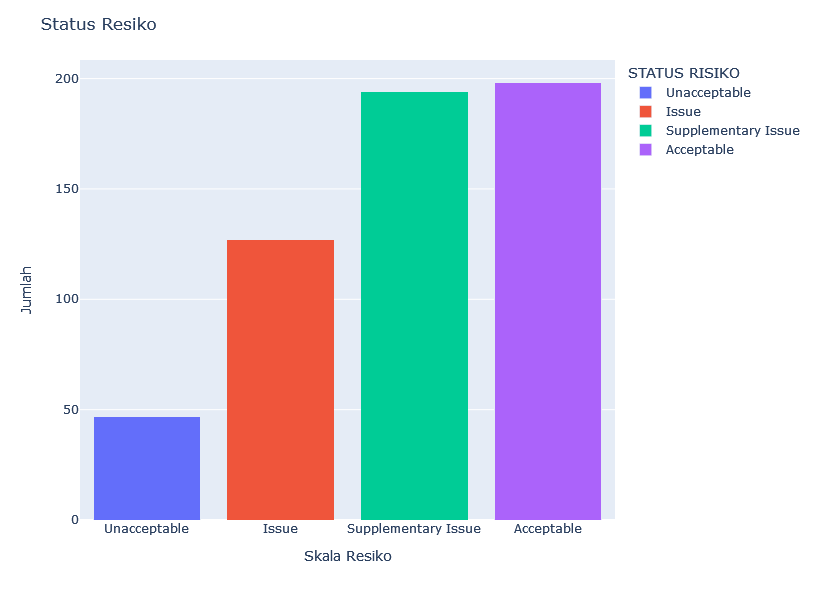

In [12]:
import plotly.express as px

# membuat grafik batang (bar-chart)
fig1 = px.bar(Status_Resiko, x='STATUS RISIKO', y='Risk Event',color='STATUS RISIKO', text_auto='.2s')

# Pengaturan detail grafik
fig1.update_layout(barmode='stack',
                  autosize=False,
                  width=600,
                  height=600,
                  showlegend=True,
                  title="Status Resiko",
                  xaxis_title="Skala Resiko",
                  yaxis_title="Jumlah")

## Kategori Resiko

### Pivot 2

In [15]:
# Tabel Pivot 
Kategori_Resiko=pd.pivot_table(df,index=['Risk Type'], values=['Risk Event'], aggfunc='count')

# Komfersi indeks menjadi Kolom
Kategori_Resiko.reset_index(inplace=True)
Kategori_Resiko

,Risk Type,Risk Event
0,Financial Risk,188
1,Legal Risk,46
2,Operational Risk,282
3,Reputation Risk,50


### Visual 2

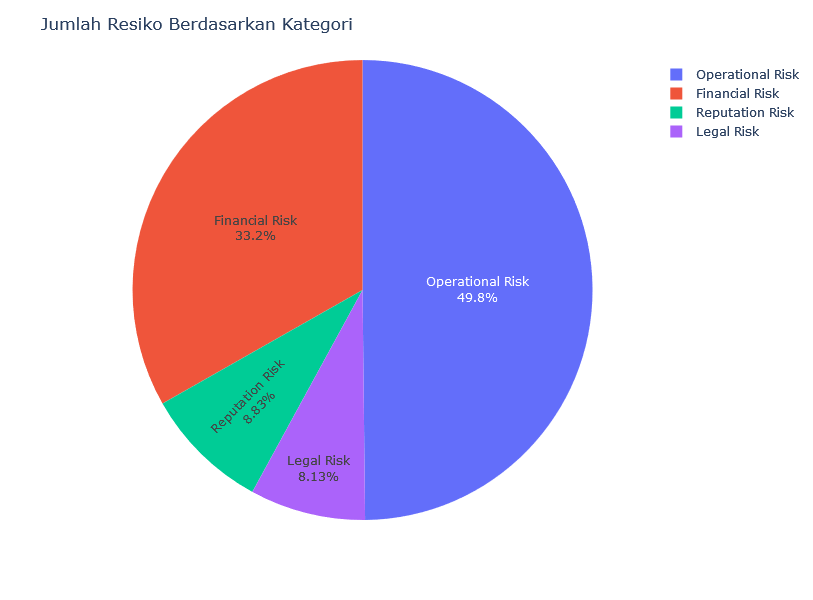

In [16]:
# membuat grafik lingkaran (pie-chart)
fig2 = px.pie(Kategori_Resiko, values='Risk Event', names='Risk Type', hole=0, 
             labels={'Risk Event':'Jumlah Resiko','Risk Type':'Kategori Resiko'})

# Pengaturan detail grafik
fig2.update_layout(showlegend=True,
                  autosize=False,
                  width=800,
                  height=600,
                  title="Jumlah Resiko Berdasarkan Kategori");

fig2.update_traces(textposition='inside', textinfo='percent+label');

fig2.show()

### Quiz Tambahan 1

Membuat grafik Pie-Chart diatas menjadi Grafik Bar-chart.

## Status Mitigasi
### Pivot 3

In [18]:
# Tabel Pivot 
Status_Mitigasi=pd.pivot_table(df,index=['STATUS MITIGASI'], values=['Risk Event'], aggfunc='count')

# Komfersi indeks menjadi Kolom
Status_Mitigasi.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
Status_Mitigasi=Status_Mitigasi.sort_values("Risk Event",ascending=False)
Status_Mitigasi

,STATUS MITIGASI,Risk Event
0,Not priority,392
1,Priority,174


### Visual 3

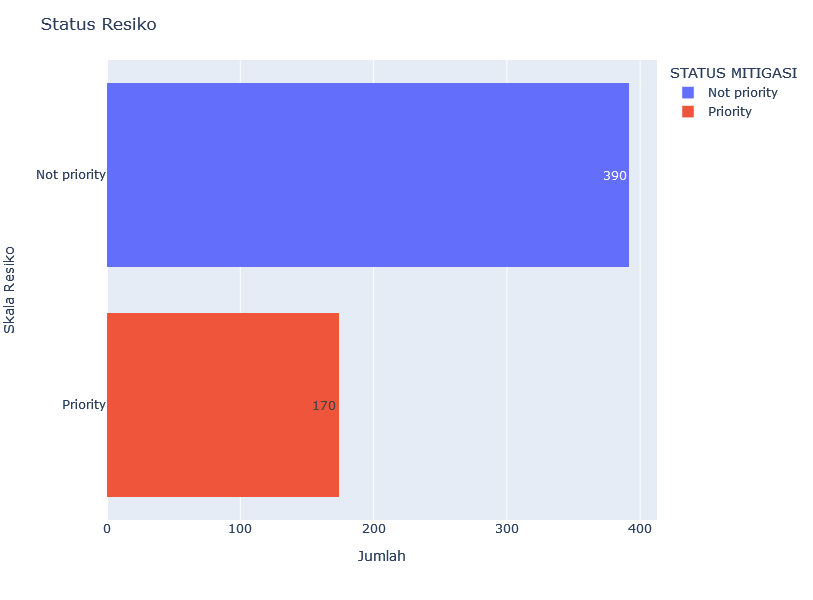

In [20]:
import plotly.express as px

# membuat grafik batang (bar-chart)
fig3 = px.bar(Status_Mitigasi, x='Risk Event', y='STATUS MITIGASI',color='STATUS MITIGASI', text_auto='.2s')

# Pengaturan detail grafik
fig3.update_layout(barmode='stack',
                  autosize=False,
                  width=800,
                  height=600,
                  showlegend=True,
                  title="Status Resiko",
                  xaxis_title="Jumlah",
                  yaxis_title="Skala Resiko")

### Quiz Tambahan 2

Buatlah grafik diatas menjadi Pie-Chart

## Mitigasi Departemen 
### Pivot 4

In [313]:
# Tabel Pivot 
Mitigasi_Departemen=pd.pivot_table(df,index=['Departemen','STATUS MITIGASI'], values=['Risk Event'], aggfunc='count')

# Komfersi indeks menjadi Kolom
Mitigasi_Departemen.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
Mitigasi_Departemen=Mitigasi_Departemen.sort_values("Risk Event",ascending=False)
Mitigasi_Departemen

,Departemen,STATUS MITIGASI,Risk Event
93,West Inbound Department,Not priority,21
31,East Inbound Department,Not priority,21
85,South Inbound Department,Not priority,21
38,Financial Accounting Department,Not priority,20
63,North Inbound Department,Not priority,19
...,...,...,...
60,National Outbound Department,Priority,1
46,IT Security Specialist,Priority,1
79,Quality Management System Department,Not priority,1
66,Operation Handling Transport Department,Priority,1


### Visual 4

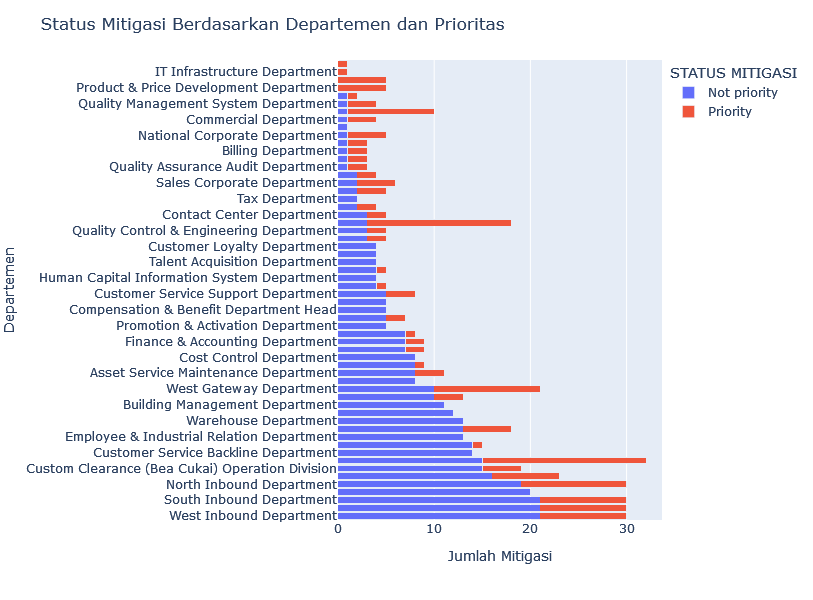

In [314]:
import plotly.express as px

# membuat grafik batang (bar-chart)
fig4 = px.bar(Mitigasi_Departemen, x='Risk Event', y='Departemen',color='STATUS MITIGASI', text_auto='.2s')

# Pengaturan detail grafik
fig4.update_layout(barmode='stack',
                  autosize=False,
                  width=800,
                  height=600,
                  showlegend=True,
                  title="Status Mitigasi Berdasarkan Departemen dan Prioritas",
                  xaxis_title="Jumlah Mitigasi",
                  yaxis_title="Departemen")

### Quiz Tambahan 3

Berdarkan data Risk Register, bagaimana jika anda ingin mengetahui berapa banyak jumlah Mitigasi berdsarakan PIC dan perlihatkan status mitigasinya.

# Risk Map

## Import Data

Pada bagian ini tidak dilakukan pengaturan direktori karena sudah digunakan sebelumnya. Langsung saja, Read (baca) data dari Excel ke Python (JupyterLab)

In [23]:
# library pandas untuk impor data
import pandas as pd                                   
Inherent = pd.read_excel('RiskRegister.xlsx',sheet_name="Risk Register", header=1, usecols='Q:U') 
Residual = pd.read_excel('RiskRegister.xlsx',sheet_name="Risk Register", header=1, usecols='V:Z')

Periksa informasi dasar dan struktur data

In [90]:
Inherent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Impact            566 non-null    object
 1   Impact Value      566 non-null    int64 
 2   Likelihood        566 non-null    object
 3   Likelihood Value  566 non-null    int64 
 4   Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


In [91]:
Residual.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Impact .1           566 non-null    object
 1   Impact Value.1      566 non-null    int64 
 2   Likelihood.1        566 non-null    object
 3   Likelihood Value.1  566 non-null    int64 
 4   Risk Level.1        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


**Catatan:** Karena nama varibel pada data Inherent dan Residual adalah sama, maka Python secara automatis melakukan penambahan indeks menggunakan nomor. Dalam hal ini ada baiknya jika nama varibel tersebut dibedakan pada saat pengumpulan data (atau bisa juga **rename**).

Berikut ini diperlihatkan **contoh error** akibat pemberian pada nama kolom dataset ada yang sama.

In [55]:
Inherent['Likelihood']    # error karena tidak ada spasi di akhir nama variabel

KeyError: 'Likelihood'

## Ubah Nama Kolom

Untuk menghindari kesalahan atau error tersebut diatas maka perlu dilakukan ubah nama kolom pada data **Inherent** dan **Residual**.

In [56]:
Inherent.columns = ['Inh-Impact', 'Inh-Impact Value', 'Inh-Likelihood',
                    'Inh-Likelihood Value','Inh-Risk Level']
Inherent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Inh-Impact            566 non-null    object
 1   Inh-Impact Value      566 non-null    int64 
 2   Inh-Likelihood        566 non-null    object
 3   Inh-Likelihood Value  566 non-null    int64 
 4   Inh-Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


In [25]:
Residual.columns = ['Res-Impact', 'Res-Impact Value', 'Res-Likelihood',
                    'Res-Likelihood Value','Res-Risk Level']
Residual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Res-Impact            566 non-null    object
 1   Res-Impact Value      566 non-null    int64 
 2   Res-Likelihood        566 non-null    object
 3   Res-Likelihood Value  566 non-null    int64 
 4   Res-Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


## Tabulasi Silang

Metode ini digunakan untuk menghitung *cross-tabulation* (tabulasi silang) dari dua atau lebih variabel kategori. Dalam hal ini, digunakan untuk menghitung frekuensi dari 

In [26]:
Tab_Inh=pd.crosstab(Inherent["Inh-Likelihood Value"],Inherent["Inh-Impact Value"])
Tab_Inh

Inh-Impact Value,1,2,3,4,5
Inh-Likelihood Value,,,,,
1,8,3,3,3,11
2,1,10,5,21,3
3,0,3,61,46,30
4,0,0,22,219,37
5,1,1,2,37,39


In [27]:
Tab_Res=pd.crosstab(Residual["Res-Likelihood Value"],Residual["Res-Impact Value"])
Tab_Res

Res-Impact Value,1,2,3,4,5
Res-Likelihood Value,,,,,
1,74,14,16,34,41
2,4,51,68,74,5
3,5,9,79,35,15
4,0,2,8,28,1
5,0,0,1,1,1


## Membalik Urutan Baris/Kolom

Dalam contoh ini, diperlihatkan cara menyusun ulang baris **(Reverse)** DataFrame dengan Python.

In [60]:
Rev_Tab_Inh = Tab_Inh[::-1]                    # Urutan baris terbalik
Rev_Tab_Inh                                    # Cetak data yang diperbarui


Inh-Impact Value,1,2,3,4,5
Inh-Likelihood Value,,,,,
5,1,1,2,37,39
4,0,0,22,219,37
3,0,3,61,46,30
2,1,10,5,21,3
1,8,3,3,3,11


In [29]:
Rev_Tab_Res = Tab_Res[::-1]                    # Urutan baris terbalik
Rev_Tab_Res                                    # Cetak data yang diperbarui

Res-Impact Value,1,2,3,4,5
Res-Likelihood Value,,,,,
5,0,0,1,1,1
4,0,2,8,28,1
3,5,9,79,35,15
2,4,51,68,74,5
1,74,14,16,34,41


**Catatan:** Seandainya anda ingin membalik urutan berdasarkan kolom perhatikan contoh berikut:

**Keterangan:** Link Penjelasan di [Youtube](https://www.youtube.com/watch?v=3cJmkdjepMw)

* **Impact** dibagi menjadi 5 kategori penilaian berikut:
    * **(1) Insignificant ,** yang artinya tidak signifikan (tidak berdampak)
    * **(2) Minor,** berdampak ringan
    * **(3) Moderate,** Sedang 
    * **(4) Major,** cukup parah
    * **(5) Catastrophic,**  sangat parah
    
* **Likelihood** dibagi menjadi 5 kategori penilaian berikut:
    * **(1) Rare,** Cenderung tidak mungkin terjadi 
    * **(2) Unlikely,**  Kemungkinan kecil terjadi
    * **(3) Possible,**  Sama kemungkinan antara terjadi dan tidak terjadi
    * **(4) Likely,**  Kemungkinan besar terjadi 
    * **(5) Certain,**  Sangat mungkin pasti terjadi 

## Risk Map Inherent 1

Berdasarkan keterangan diatas, berikut ini ditampilkan matriks resikonya secara visual:

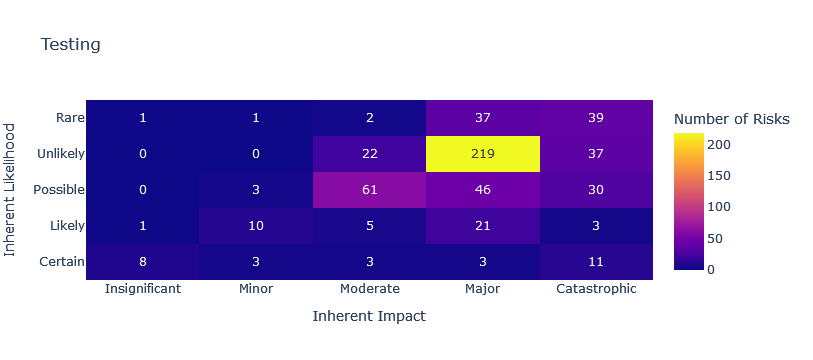

In [62]:
import plotly.express as px

fig5 = px.imshow(Rev_Tab_Inh,
                 x=['Insignificant', 'Minor', 'Moderate','Major','Catastrophic'],
                 y=['Rare', 'Unlikely', 'Possible', 'Likely', 'Certain'],
                 labels=dict(x="Inherent Impact", 
                            y="Inherent Likelihood", 
                            color="Number of Risks"),
                 text_auto=True,
                 aspect="auto",
                 title="Testing"
                )
fig5.update_xaxes(side="bottom")
fig5.show()

## Quiz 1

Contoh diatas adalah visualisasi Risk Map Inherent. Dengan cara yang sama, buatlah Risk Map Residualnya!

## Risk Map Inherent 2

Sebelumnya sudah diperlihatkan matriks resiko dengan warna berdasarkan skala frekuensi min hingga max. Jika ingin merubahnya sesuai standar berlaku di JNE, maka perlu dilakukan pengaturan skala matriks-nya terlebih dahulu. 

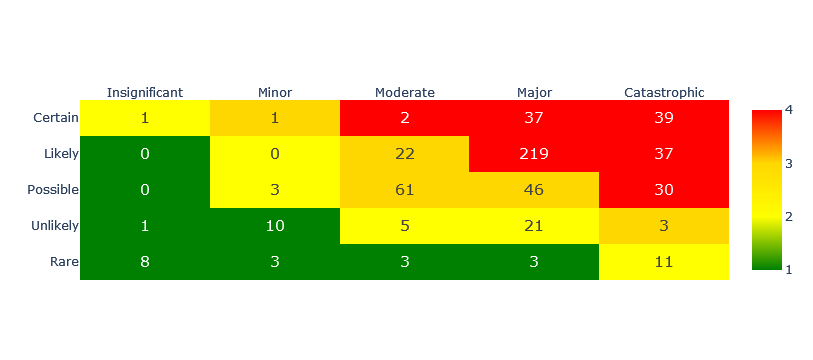

In [74]:
scala = [[2, 3, 4, 4, 4],
         [1, 2, 3, 4, 4],
         [1, 2, 3, 3, 4],
         [1, 1, 2, 2, 3],
         [1, 1, 1, 1, 2]]

scala = scala[::-1]                            # Urutan baris terbalik

Matriks_Inh=Tab_Inh.to_numpy()                 # rubah tabulasi jd matriks

import plotly.graph_objects as go

fig7= go.Figure(data=go.Heatmap(
                x=['Insignificant', 'Minor', 'Moderate','Major','Catastrophic'],
                y=['Rare', 'Unlikely', 'Possible', 'Likely', 'Certain'],
                z=scala,
                text=Matriks_Inh,
                texttemplate="%{text}",
                textfont={"size":15},
colorscale = ['green','yellow','gold','red']))

fig7.update_xaxes(side="top")

fig7.show()

**Keterangan:** Representasi kategori resiko yang dihasilkan dari penilaian matriks resiko, adalah sebagai berikut:

* **Hijau (1)  Acceptable :** Tidak ada tindakan yang diperlukan
* **Kuning (2) Supplementary Issue :** tindakan dianjurkan jika sumber daya yang tersedia
* **Keemasan (3) Issue :** Tindakan yang diperlukan untuk mengelola risiko tambahan (dampak lainnnya)
* **Merah (4) Unacceptable :** Tindakan segera dilakukan untuk mengelola risiko

## Quiz 2

Contoh diatas adalah visualisasi Heatmap Inherent dengan skala standar JNE. Dengan cara yang sama, buatlah Risk Map Residualnya!

## Persentasi Resiko Inherent  

In [ ]:
Matriks_Inh = Rev_Tab_Inh.to_numpy()

In [ ]:
Total_Risk_Reg = Matriks_Inh.sum()

In [34]:
Acceptable= Matriks_Inh[1:5,0].sum()+Matriks_Inh[3:5,1].sum()+Matriks_Inh[4,2]+Matriks_Inh[4,3]

In [35]:
Supplementary_Issue= Matriks_Inh[0,0]+ Matriks_Inh[2:3,1].sum()+Matriks_Inh[3,2]+Matriks_Inh[3,3]+Matriks_Inh[4,4]

In [36]:
Issue = Matriks_Inh[0,1]+ Matriks_Inh[1:3,2].sum()+Matriks_Inh[2,3]+Matriks_Inh[3,4]

In [37]:
Unacceptable = Total_Risk_Reg - (Acceptable+Supplementary_Issue+Issue)

In [79]:
Persen_Low_Risk = (Acceptable+Supplementary_Issue)/Total_Risk_Reg
print("{:.0%}".format(Persen_Low_Risk))

12%


In [39]:
Persen_High_Risk = 1-Persen_Low_Risk
print("{:.0%}".format(Persen_High_Risk))

88%


## Quiz 3 

Buatlah perhitungan Resiko Residualnya!

### Membuat Dataframe

In [86]:
import pandas as pd
  
# Inisial Data List.
data_awal = {'Keterangan': ['Acceptable', 'Supplementary Issue', 'Issue', 'Unacceptable'],
        'Jumlah': [Acceptable, Supplementary_Issue, Issue, Unacceptable]}

# Buat Kedalam bentuk dataframe
df = pd.DataFrame(data_awal)
df 

,Keterangan,Jumlah
0,Acceptable,28
1,Supplementary Issue,41
2,Issue,133
3,Unacceptable,364


In [87]:
# Tambah Kolom baru
df['Persentase']=df['Jumlah']/df['Jumlah'].sum()
df

,Keterangan,Jumlah,Persentase
0,Acceptable,28,0.049470
1,Supplementary Issue,41,0.072438
2,Issue,133,0.234982
3,Unacceptable,364,0.643110


In [88]:
# Merubah format Kolom
df.loc[:, 'Persentase'] = df['Persentase'].map('{:.2%}'.format)
df

,Keterangan,Jumlah,Persentase
0,Acceptable,28,4.95%
1,Supplementary Issue,41,7.24%
2,Issue,133,23.50%
3,Unacceptable,364,64.31%


# CSA
## Import Data

In [319]:
# Change the current working directory
os.chdir('C:/Users/user/Desktop/Py_JNE/data/CS')

csa = pd.read_excel('RiskRegister.xlsx',sheet_name="CSA",skiprows=1,usecols='B:O')
csa

,Departemen,Source Data Process,Business Area/Objective/Activity,Risk/Event,Type,Detail,To Reduce,D,I,M,E,Total,Scale,Note
0,Warehouse Department,RG/WHD-001/II/2020,Memberikan layanan 3PL (Third Party Logistics)...,Barang Rusak,Prosedur Kerja,(SOP Penyimpanan barang) 4.6. PIC Inbound dan ...,Likelihood & Impact,3,3,2,2,0.883333,Very Effective,NaN
1,Warehouse Department,RG/WHD-002/III/2020,Memberikan layanan 3PL (Third Party Logistics)...,Ketidak lengkapan Barang,Prosedur Kerja,(SOP Penyimpanan barang) 4.6. PIC Inbound dan ...,Likelihood & Impact,3,3,2,2,0.883333,Very Effective,NaN
2,Warehouse Department,RG/WHD-003/II/2020,Memberikan layanan 3PL (Third Party Logistics)...,Kehilangan barang customer,Prosedur Kerja,Cycle Count (cek sebagain)\n4.3 Staff put away...,Likelihood & Impact,3,3,2,2,0.883333,Very Effective,NaN
3,Warehouse Department,RG/WHD-004/II/2020,Memberikan layanan 3PL (Third Party Logistics)...,Kiriman expired,Prosedur Kerja,(SOP Penyimpanan barang) 4.6. PIC Inbound dan ...,Likelihood & Impact,3,3,2,2,0.883333,Very Effective,NaN
4,Warehouse Department,RG/WHD-005/II/2020,Memberikan layanan 3PL (Third Party Logistics)...,Rusak saat penanganan warehouse,Prosedur Kerja,(SOP Penyimpanan barang ) Penyusunan barang di...,Likelihood & Impact,3,3,2,2,0.883333,Very Effective,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,Media Relation Department,RG/MDR-001/III/2020,Publikasi pemberitaan positif mengenai perkemb...,Adanya pemberitaan negatif dari pihak eksterna...,Komunikasi,Adanya team PR regional yang memonitoring pemb...,Likelihood,2,2,2,2,0.433333,Moderately Effective,Pembentukan tim tersebut sudah di bentuk pada ...
3175,Media Relation Department,RG/MDR-001/III/2020,Publikasi pemberitaan positif mengenai perkemb...,Adanya pemberitaan negatif dari pihak eksterna...,Komitmen Terhadap Kompetensi,Training sosial media untuk PIC admin social m...,Likelihood,2,2,2,2,0.433333,Moderately Effective,Training tersebut dilakukan untuk refresmen da...
3176,Media Relation Department,RG/MDR-002/III/2020,Publikasi pemberitaan positif mengenai perkemb...,Adanya pemberitaan negatif dari pihak eksterna...,Sistem IT,Membuat mini command centre,Likelihood,2,2,2,2,0.433333,Moderately Effective,Sistem tersebut sudah efektif untuk mengetahui...
3177,Media Relation Department,RG/MDR-002/III/2020,Meningkatkan sentimen positif perusahaan melal...,Munculnya sentimen negatif di social media dan...,Komunikasi,Melakukan pengumpulan akun karyawan yg memilik...,Likelihood,2,2,2,2,0.433333,Moderately Effective,Dapat membantu menaikan sentimentil positif te...


# 